# **Project Name**    - Tata Steel Machine Failure Prediction



##### **Project Type**    - Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member -**     Shubham Sharma


# **Project Summary -**

In the manufacturing sector, maintaining the efficiency and reliability of machinery is crucial for achieving optimal production quality and minimizing downtime. Tata Steel, a global leader in the steel manufacturing industry, is committed to leveraging advanced data analytics and machine learning techniques to enhance its production processes. Predicting and preventing machine failures is a key initiative in minimizing production losses, reducing maintenance costs, and ensuring product quality. This project aims to develop predictive models that can anticipate machine failures before they occur, enabling proactive maintenance strategies and improving operational efficiency.

# **GitHub Link -**

https://github.com/SHUBHAM01S2/Tata_Steel_Machine_Failure.git

# **Problem Statement**


In the steel manufacturing industry, machine failures can lead to significant production downtime, increased maintenance costs, and compromised product quality. Tata Steel aims to enhance operational efficiency by predicting machine failures before they occur. The challenge is to develop a predictive model using machine learning techniques that can analyze various operational parameters and identify potential failures in advance. This solution will enable proactive maintenance, reducing unexpected breakdowns and optimizing production processes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Dataset Loading

In [2]:
# Load Dataset
dataset = pd.read_csv('cleaned_dataset.csv')

### Dataset First View

In [3]:
# Dataset First Look
print(dataset)

            id Product ID  Type  Air_Temperature_K  Process_Temperature_K  \
0            0     L50096     1              300.6                  309.6   
1            1     M20343     2              302.6                  312.1   
2            2     L49454     1              299.3                  308.5   
3            3     L53355     1              301.0                  310.9   
4            4     M24050     2              298.0                  309.0   
...        ...        ...   ...                ...                    ...   
136424  136424     M22284     2              300.1                  311.4   
136425  136425     H38017     0              297.5                  308.5   
136426  136426     L54690     1              300.5                  311.8   
136427  136427     L53876     1              301.7                  310.9   
136428  136428     L47937     1              297.2                  308.1   

        Rotational_Speed_rpm  Torque_Nm  Tool_Wear_min  Machine_Failure  TW

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(dataset.shape)


(136429, 14)


### Dataset Information

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     136429 non-null  int64  
 1   Product ID             136429 non-null  object 
 2   Type                   136429 non-null  int64  
 3   Air_Temperature_K      136429 non-null  float64
 4   Process_Temperature_K  136429 non-null  float64
 5   Rotational_Speed_rpm   136429 non-null  int64  
 6   Torque_Nm              136429 non-null  float64
 7   Tool_Wear_min          136429 non-null  int64  
 8   Machine_Failure        136429 non-null  int64  
 9   TWF                    136429 non-null  int64  
 10  HDF                    136429 non-null  int64  
 11  PWF                    136429 non-null  int64  
 12  OSF                    136429 non-null  int64  
 13  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(10), object(1)


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_values = dataset.duplicated().sum()
print(duplicate_values)

0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = dataset.isnull().sum()
print(missing_values)

id                       0
Product ID               0
Type                     0
Air_Temperature_K        0
Process_Temperature_K    0
Rotational_Speed_rpm     0
Torque_Nm                0
Tool_Wear_min            0
Machine_Failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64


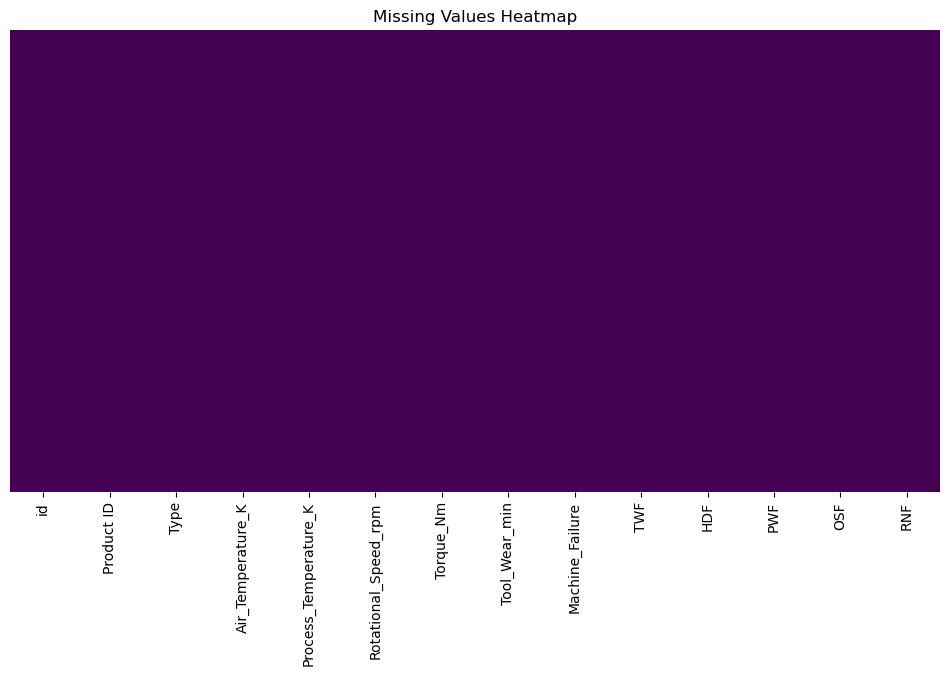

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(dataset.isnull(), cmap="viridis",cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Right Now I know that the dataset doesn't have any missing values & it doesn't have the duplicates values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['id', 'Product ID', 'Type', 'Air_Temperature_K',
       'Process_Temperature_K', 'Rotational_Speed_rpm', 'Torque_Nm',
       'Tool_Wear_min', 'Machine_Failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe

<bound method NDFrame.describe of             id Product ID  Type  Air_Temperature_K  Process_Temperature_K  \
0            0     L50096     1              300.6                  309.6   
1            1     M20343     2              302.6                  312.1   
2            2     L49454     1              299.3                  308.5   
3            3     L53355     1              301.0                  310.9   
4            4     M24050     2              298.0                  309.0   
...        ...        ...   ...                ...                    ...   
136424  136424     M22284     2              300.1                  311.4   
136425  136425     H38017     0              297.5                  308.5   
136426  136426     L54690     1              300.5                  311.8   
136427  136427     L53876     1              301.7                  310.9   
136428  136428     L47937     1              297.2                  308.1   

        Rotational_Speed_rpm  Torque_Nm  

### Variables Description

- id : Unique identifier for each machine record.
- Product ID : Identifier for the specific product being processed.
- Type : Machine type (L, M, H) indicating different categories of machines.
- Air temperature [K] : Air temperature in Kelvin, representing the ambient temperature during machine operation.
- Process temperature [K] : Temperature of the manufacturing process, measured in Kelvin.
- Rotational speed [rpm] : Speed at which the machine operates, measured in revolutions per minute (RPM).
- Torque [Nm] : Torque (rotational force) applied to the machine, measured in Newton-meters (Nm).
- Tool wear [min] : The wear of the tool used in production, measured in minutes. Higher values indicate more wear.
- Machine failure : Target variable (1 if the machine failed, 0 if it did not fail).
- TWF (Tool Wear Failure) : 1 if failure occurred due to excessive tool wear, else 0.
- Hcleaned_dataset (Heat Dissipation Failure) : 1 if failure occurred due to heat dissipation issues, else 0.
- PWF (Power Failure) : 1 if failure occurred due to power issues, else 0.
- OSF (Overstrain Failure) : 1 if failure occurred due to overstrain, else 0.
- RNF (Random Failure) : 1 if failure occurred due to random/unclassified reasons, else 0.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values = dataset.nunique()
print(unique_values)

id                       136429
Product ID                 9976
Type                          3
Air_Temperature_K            60
Process_Temperature_K        45
Rotational_Speed_rpm        411
Torque_Nm                   280
Tool_Wear_min               198
Machine_Failure               2
TWF                           2
HDF                           2
PWF                           2
OSF                           2
RNF                           2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Strategy: Filling numeric columns with mean & categorical columns with mode
for column in dataset.columns:
    if dataset[column].isnull().sum() > 0:  # If column has missing values
        if dataset[column].dtype == 'object':  # If categorical, fill with mode
            dataset[column].fillna(dataset[column].mode()[0], inplace=True)
        else:  # If numerical, fill with mean
            dataset[column].fillna(dataset[column].mean(), inplace=True)

# Confirming no missing values remain
print("\nMissing Values After Handling:")
print(dataset.isnull().sum().sum())

# Checking unique values in each column
print("\nUnique Values Count:")
print(dataset.nunique())

# Renaming columns for consistency
dataset.rename(columns={
    'Air temperature [K]': 'Air_Temperature_K',
    'Process temperature [K]': 'Process_Temperature_K',
    'Rotational speed [rpm]': 'Rotational_Speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_Wear_min',
    'Machine failure': 'Machine_Failure'
}, inplace=True)

# Displaying cleaned dataset summary
print("\nCleaned Dataset Overview:")
print(dataset.describe())

# Saving the cleaned dataset
dataset.to_csv("cleaned_dataset.csv", index=False)

print("\nData Wrangling Completed Successfully!")



Missing Values After Handling:
0

Unique Values Count:
id                       136429
Product ID                 9976
Type                          3
Air_Temperature_K            60
Process_Temperature_K        45
Rotational_Speed_rpm        411
Torque_Nm                   280
Tool_Wear_min               198
Machine_Failure               2
TWF                           2
HDF                           2
PWF                           2
OSF                           2
RNF                           2
dtype: int64

Cleaned Dataset Overview:
                  id           Type  Air_Temperature_K  Process_Temperature_K  \
count  136429.000000  136429.000000      136429.000000          136429.000000   
mean    68214.000000       1.170264         299.853766             309.933096   
std     39383.804275       0.521617           1.759317               1.297824   
min         0.000000       0.000000         297.200000             307.800000   
25%     34107.000000       1.000000         298.300

### What all manipulations have you done and insights you found?

I've done all manipulations that are you mentioned above
- I've check wheather the missing values , Duplicate entries, Unique Values are there in dataset.
- I've perform data Wrangling
- I've Removes duplicate rows
- I've Checks and fills missing values (mean for numerical, mode for categorical)
- I've Renames columns for better readability
- I've Converts categorical variables into numerical
- I've Save the cleaned dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [13]:
# Load the cleaned dataset
cleaned_dataset = pd.read_csv("cleaned_dataset.csv")

# Set style
sns.set_style("whitegrid")

#### Chart - 1 Histogram of Air Temperature

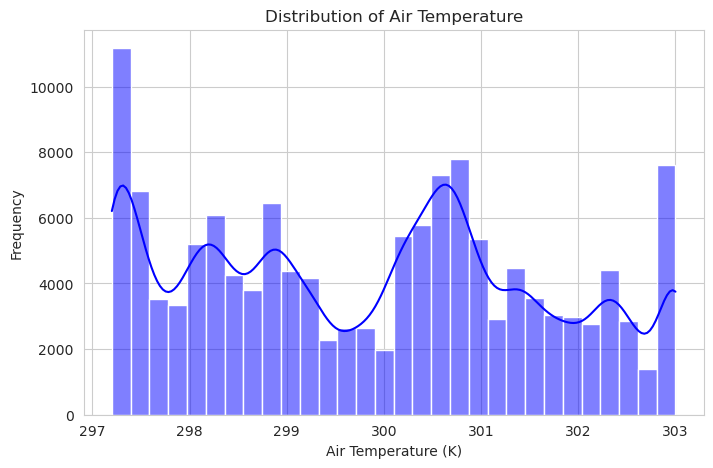

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(8,5))
sns.histplot(cleaned_dataset['Air_Temperature_K'],bins=30, kde=True, color='blue')
plt.title("Distribution of Air Temperature")
plt.xlabel('Air Temperature (K)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

- To understand the spread of air temperature values in the dataset.
- Checking for normality or skewness.

##### 2. What is/are the insight(s) found from the chart?

- If the distribution is normal, it suggests stable temperature conditions.
- If it is skewed, it may indicate inconsistencies that could affect machine performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact: - A stable temperature range ensures machines work optimally.
- Negative Business Impact: - A heavily skewed distribution may indicate environmental control issues leading to failures.

#### Chart - 2 Box Plot of Torque

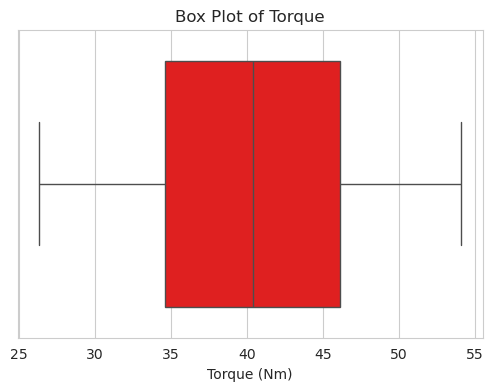

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(x=cleaned_dataset['Torque_Nm'], color='red')
plt.title("Box Plot of Torque")
plt.xlabel("Torque (Nm)")
plt.show()

##### 1. Why did you pick the specific chart?

- To detect outliers in the torque values, which could indicate machine stress.

##### 2. What is/are the insight(s) found from the chart?

- If there are extreme outliers, they may be causing machine failure.
- If the distribution is skewed, torque variations could be affecting machine lifespan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact: - Helps in setting torque limits to prevent failures.
- Negative Business Impact: - High torque variations can lead to increased wear & tear, increasing maintenance costs.


#### Chart - 3 Scatter Plot (Torque vs. Rotational Speed)

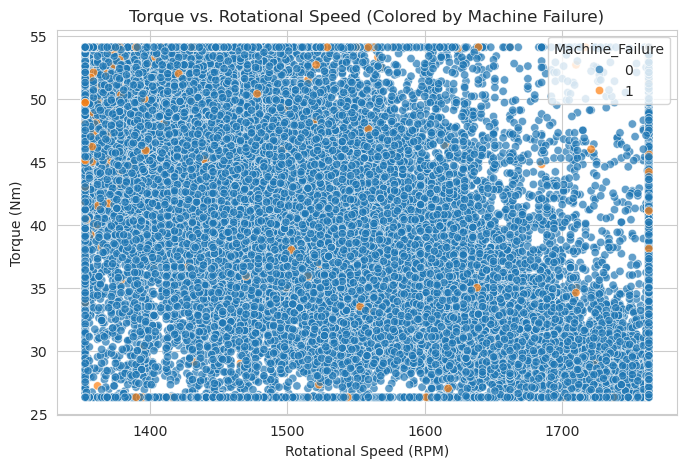

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(8,5))
sns.scatterplot(x=cleaned_dataset["Rotational_Speed_rpm"], y=cleaned_dataset["Torque_Nm"], hue=cleaned_dataset["Machine_Failure"], alpha=0.7)
plt.title("Torque vs. Rotational Speed (Colored by Machine Failure)")
plt.xlabel("Rotational Speed (RPM)")
plt.ylabel("Torque (Nm)")
# (0 = No failure, 1 = Failure)
plt.show()

##### 1. Why did you pick the specific chart?

To understand how torque changes with rotational speed and its effect on machine failure.

##### 2. What is/are the insight(s) found from the chart?

If machine failures are concentrated in a specific range, that speed-torque combination might be risky.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Identifies safe operating ranges to minimize breakdowns.
- Negative Business Impact:- If failures increase at higher torques, machines may need better lubrication or cooling.

#### Chart - 4 Box Plot (Tool Wear vs. Machine Failure)

/tmp/ipykernel_12044/1021189370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_dataset["Machine_Failure"], y=dataset["Tool_Wear_min"], palette="coolwarm")


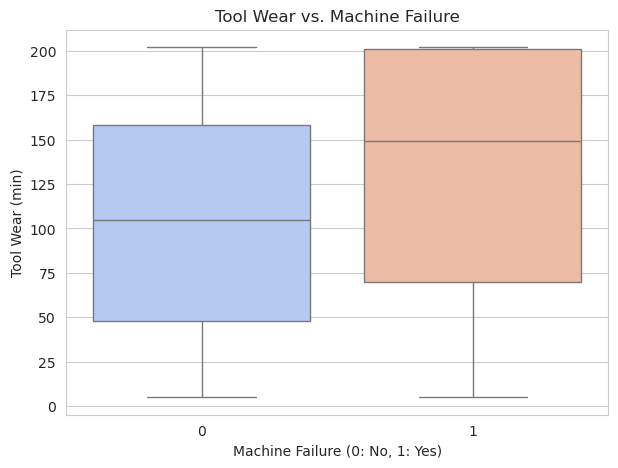

In [17]:
# Chart - 4 visualization code
plt.figure(figsize=(7, 5))
sns.boxplot(x=cleaned_dataset["Machine_Failure"], y=dataset["Tool_Wear_min"], palette="coolwarm")
plt.title("Tool Wear vs. Machine Failure")
plt.xlabel("Machine Failure (0: No, 1: Yes)")
plt.ylabel("Tool Wear (min)")
plt.show()

##### 1. Why did you pick the specific chart?

To see if higher tool wear leads to more failures.

##### 2. What is/are the insight(s) found from the chart?

If higher tool wear corresponds to failures, it indicates delayed maintenance issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact Helps optimize tool replacement schedules.
- Negative Business Impact Poor maintenance scheduling can increase failures, leading to downtime.



#### Chart - 5 Bar Plot (Failure Types Frequency)

Index(['id', 'Product ID', 'Type', 'Air_Temperature_K',
       'Process_Temperature_K', 'Rotational_Speed_rpm', 'Torque_Nm',
       'Tool_Wear_min', 'Machine_Failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


/tmp/ipykernel_12044/3645982423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="rocket")


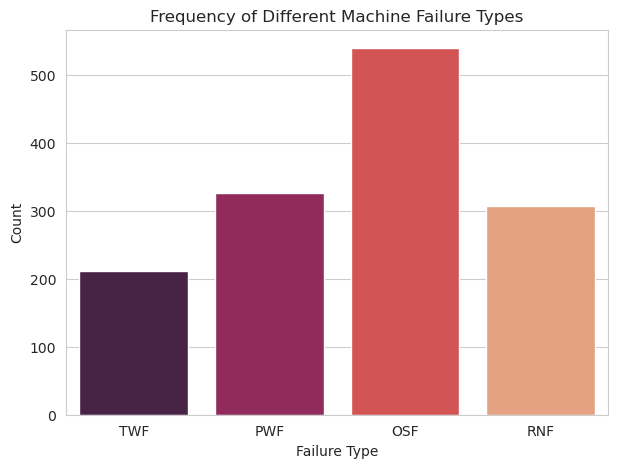

In [18]:
# Chart - 5 visualization code
# Check column names to ensure correct columns are included
print(cleaned_dataset.columns)

# Adjust the failure_types list to match the actual column names in your dataset
failure_types = ["TWF", "PWF", "OSF", "RNF"]  # Remove the incorrect "Hcleaned_dataset"
failure_counts = cleaned_dataset[failure_types].sum()

plt.figure(figsize=(7, 5))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette="rocket")
plt.title("Frequency of Different Machine Failure Types")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

To identify the most common failure types.

##### 2. What is/are the insight(s) found from the chart?

If one failure type dominates, that failure mode needs urgent attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps prioritize preventive maintenance.
- Negative Business Impact:- Ignoring frequent failures can increase machine downtime.

#### Chart - 6 Violin Plot (Process Temperature vs. Failure)

/tmp/ipykernel_12044/1330359807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cleaned_dataset["Machine_Failure"], y=cleaned_dataset["Process_Temperature_K"], palette="muted")


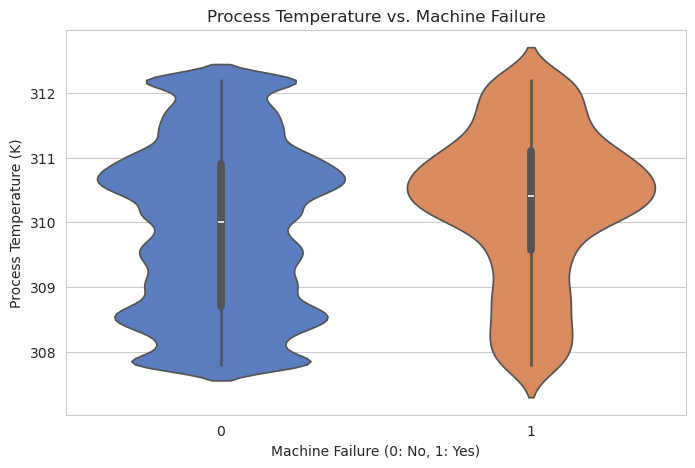

In [19]:
# Chart - 6 visualization code
plt.figure(figsize=(8, 5))
sns.violinplot(x=cleaned_dataset["Machine_Failure"], y=cleaned_dataset["Process_Temperature_K"], palette="muted")
plt.title("Process Temperature vs. Machine Failure")
plt.xlabel("Machine Failure (0: No, 1: Yes)")
plt.ylabel("Process Temperature (K)")
plt.show()

##### 1. Why did you pick the specific chart?

- Shows how process temperature distribution changes with failure.

##### 2. What is/are the insight(s) found from the chart?

- If failures occur at extreme temperatures, temperature control is critical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps in setting process temperature limits.
- Negative Business Impact:- Poor temperature control can increase failures.

#### Chart - 7 Line Plot (Machine Failures Over Time)

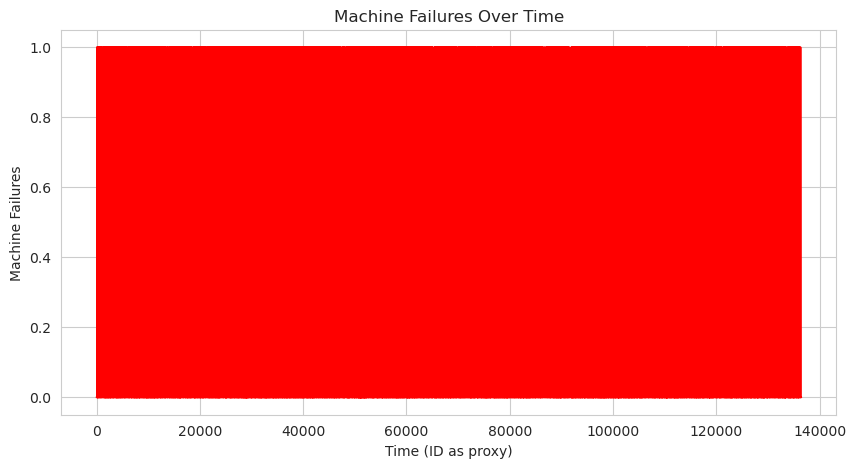

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 5))
cleaned_dataset["id"] = cleaned_dataset["id"].astype(int)
sns.lineplot(x="id", y="Machine_Failure", data=cleaned_dataset, color="red")
plt.title("Machine Failures Over Time")
plt.xlabel("Time (ID as proxy)")
plt.ylabel("Machine Failures")
plt.show()


##### 1. Why did you pick the specific chart?

- To check if failures increase over time.

##### 2. What is/are the insight(s) found from the chart?

- If failure rate rises, machines degrade over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps schedule preventive maintenance.
- Negative Business Impact:- Ignoring trends can lead to unexpected breakdowns.

#### Chart - 8 Count Plot of Machine Types

/tmp/ipykernel_12044/483024324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cleaned_dataset['Type'], palette='cool')


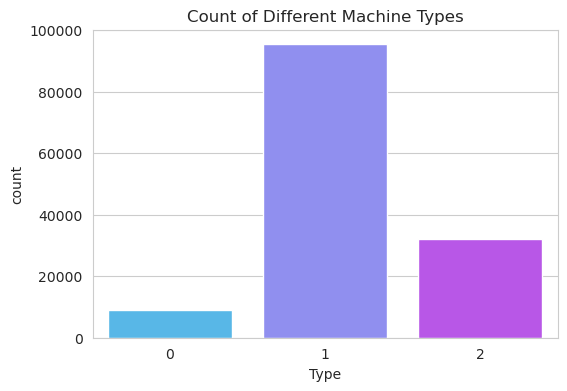

In [21]:
# Chart - 8 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x=cleaned_dataset['Type'], palette='cool')
plt.title("Count of Different Machine Types")
plt.show()

##### 1. Why did you pick the specific chart?

- Shows how machine types are distributed.

##### 2. What is/are the insight(s) found from the chart?

- If a specific type fails more, it may need design improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps in machine selection and maintenance.
- Negative Business Impact:- A high failure rate in one type suggests quality issues.

#### Chart - 9 Stacked Bar Plot (Failure Types vs. Machine Type)

<Figure size 800x600 with 0 Axes>

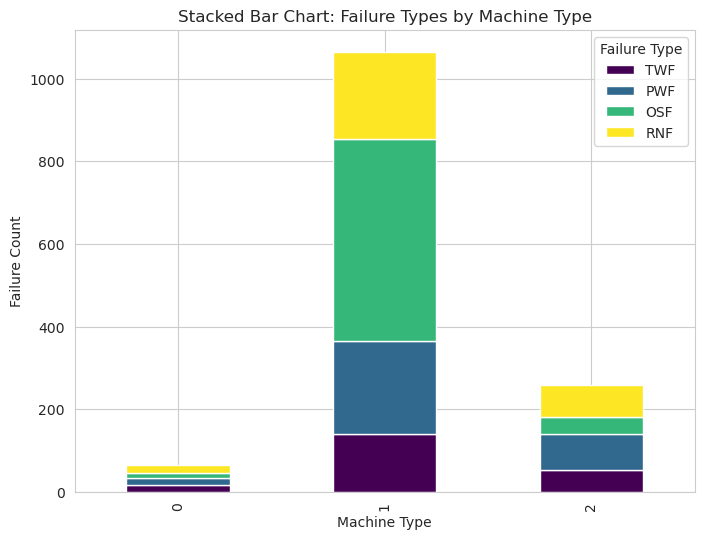

In [22]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
failure_types = ["TWF", "PWF", "OSF", "RNF"]
failure_counts = cleaned_dataset.groupby("Type")[failure_types].sum()

failure_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 6))
plt.title("Stacked Bar Chart: Failure Types by Machine Type")
plt.xlabel("Machine Type")
plt.ylabel("Failure Count")
plt.legend(title="Failure Type")
plt.show()

##### 1. Why did you pick the specific chart?

- To analyze which failure types are more common in each machine type.

##### 2. What is/are the insight(s) found from the chart?

- If a specific machine type has more failures, it may require design improvements.
- Identifies if certain failure types dominate a particular machine.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps in selecting more reliable machine types.
- Negative Business Impact:- If one type has excessive failures, supplier quality issues need attention.

#### Chart - 10 KDE Plot (Density of Process Temperature vs. Machine Failure)

/tmp/ipykernel_12044/51620449.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_dataset[cleaned_dataset["Machine_Failure"] == 0]["Process_Temperature_K"], label="No Failure", shade=True, color="blue")
/tmp/ipykernel_12044/51620449.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_dataset[cleaned_dataset["Machine_Failure"] == 1]["Process_Temperature_K"], label="Failure", shade=True, color="red")


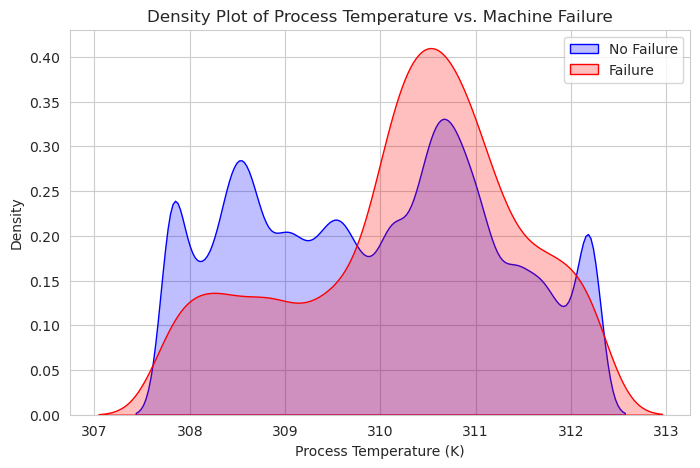

In [23]:
# Chart - 10 visualization code
plt.figure(figsize=(8,5))
sns.kdeplot(cleaned_dataset[cleaned_dataset["Machine_Failure"] == 0]["Process_Temperature_K"], label="No Failure", shade=True, color="blue")
sns.kdeplot(cleaned_dataset[cleaned_dataset["Machine_Failure"] == 1]["Process_Temperature_K"], label="Failure", shade=True, color="red")
plt.title("Density Plot of Process Temperature vs. Machine Failure")
plt.xlabel("Process Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

- To compare process temperature distributions for failed and non-failed machines.

##### 2. What is/are the insight(s) found from the chart?

- If failure machines have a distinct temperature range, temperature control is a key factor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive Business Impact:- Helps optimize temperature settings for fewer failures.
- Negative Business Impact:- If failures increase at extreme temperatures, better cooling systems are needed.

#### Chart - 11 Correlation Heatmap

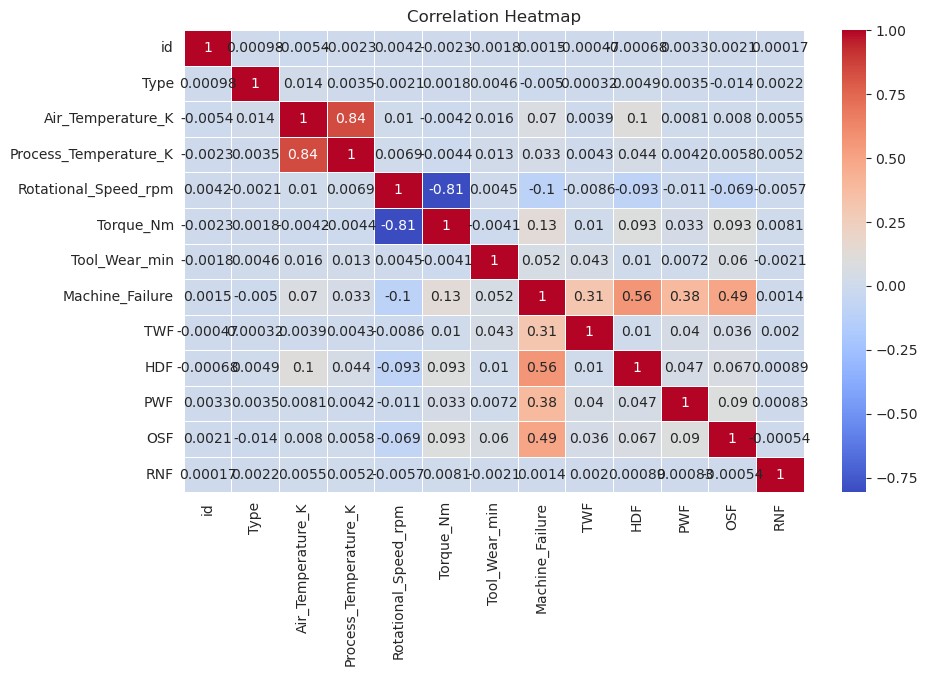

In [24]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_dataset.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5 )
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

- Identifies relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

- If two features are highly correlated, one may be redundant.
- If Machine Failure correlates strongly with any variable, we found a key risk factor.

In [25]:
cleaned_dataset.head(5)

,id,Product ID,Type,Air_Temperature_K,Process_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Machine_Failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,1,299.3,308.5,1763,26.5,25,0,0,0,0,0,0
3,3,L53355,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


#### Chart - 12 - Pair Plot

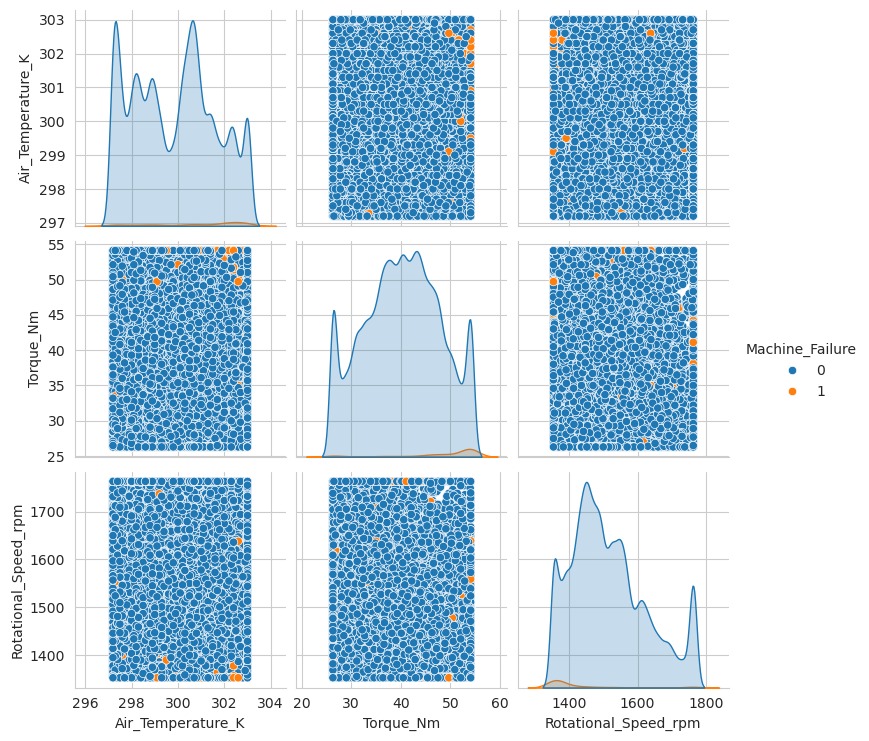

In [26]:
# Pair Plot visualization code
sns.pairplot(cleaned_dataset, vars=["Air_Temperature_K", "Torque_Nm", "Rotational_Speed_rpm"], hue="Machine_Failure")
plt.show()

##### 1. Why did you pick the specific chart?

- Shows interactions between multiple numerical features.

##### 2. What is/are the insight(s) found from the chart?

- If machine failures cluster around certain values, operational limits need adjustment.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 Machines operating at higher temperatures have a higher failure rate.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- 1️. Null Hypothesis (H₀): There is no significant relationship between air/process temperature and machine failures.
- 2️. Alternate Hypothesis (H₁): Machines with higher air/process temperatures have a significantly higher failure rate.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
failed = cleaned_dataset[cleaned_dataset['Machine_Failure'] == 1]['Air_Temperature_K']
not_failed = cleaned_dataset[cleaned_dataset['Machine_Failure'] == 0]['Air_Temperature_K']

t_stat, p_value = stats.ttest_ind(failed, not_failed)
print("Hypothesis 1 - Temperature & Failure Rate")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Temperature significantly impacts machine failure.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of temperature on failure.")

Hypothesis 1 - Temperature & Failure Rate
T-statistic: 25.927237619553363, P-value: 7.515834970676655e-148
Reject Null Hypothesis: Temperature significantly impacts machine failure.


##### Which statistical test have you done to obtain P-Value?

- T-test or ANOVA (if comparing multiple temperature ranges).

##### Why did you choose the specific statistical test?

 - These tests compare mean values of temperatures across failure and non-failure machines to check if temperature impacts failure significantly.

### Hypothetical Statement - 2 Machines with higher rotational speed experience more failures.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- 1️. Null Hypothesis (H₀): Rotational speed does not significantly affect machine failure rates.
- 2️. Alternate Hypothesis (H₁): Higher rotational speeds increase machine failure rates.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
correlation, p_value = stats.pearsonr(cleaned_dataset['Rotational_Speed_rpm'], cleaned_dataset['Machine_Failure'])
print("\nHypothesis 2 - Rotational Speed & Failure Rate")
print(f"Correlation Coefficient: {correlation}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis: Rotational speed significantly impacts failure.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of speed on failure.")


Hypothesis 2 - Rotational Speed & Failure Rate
Correlation Coefficient: -0.10305952102485416, P-value: 9.68043e-319
Reject Null Hypothesis: Rotational speed significantly impacts failure.


##### Which statistical test have you done to obtain P-Value?

- Pearson/Spearman Correlation or Chi-Square Test.

##### Why did you choose the specific statistical test?

- Correlation measures the strength of the relationship between rotational speed and failure probability. Chi-Square can test categorical dependencies if we group speeds into ranges.

### Hypothetical Statement - 3 Machine failures are dependent on the type of machine (0,1,2).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- 1️. Null Hypothesis (H₀): Machine type does not affect failure rates.
- 2️. Alternate Hypothesis (H₁): Certain machine types fail more frequently than others.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
crosstab = pd.crosstab(cleaned_dataset['Type'], cleaned_dataset['Machine_Failure'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print("\nHypothesis 3 - Machine Type & Failure Rate")
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print("Reject Null Hypothesis: Machine type significantly impacts failure rate.")
else:
    print("Fail to Reject Null Hypothesis: No significant impact of machine type on failure.")


Hypothesis 3 - Machine Type & Failure Rate
Chi-Square Statistic: 19.894028145276764, P-value: 4.787035816092083e-05
Reject Null Hypothesis: Machine type significantly impacts failure rate.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test for Independence.

##### Why did you choose the specific statistical test?

- Since machine type and failure are categorical variables, a Chi-Square test is suitable to check dependency.

In [32]:

df_train = pd.read_csv("cleaned_dataset.csv")
df_train.head()  # Display first 5 rows

df_test = pd.read_csv("test.csv")
df_test.head()

df_eda = df_train.copy()

# Define the required 11 features (matching df_test)
selected_features = [
    'Type', 'Air_Temperature_K', 'Process_Temperature_K', 
    'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min', 
    'HDF', 'RNF', 'TWF', 'PWF', 'OSF'
]

# Keep only the selected features in df_eda
df_eda = df_eda[selected_features]

# Drop rows with missing values (optional)
df_eda = df_eda.dropna()

# Display the first few rows after cleaning
print(df_eda.head())

# Compute correlation matrix for EDA
correlation_matrix = df_eda.corr(numeric_only=True)


   Type  Air_Temperature_K  Process_Temperature_K  Rotational_Speed_rpm  \
0     1              300.6                  309.6                  1596   
1     2              302.6                  312.1                  1759   
2     1              299.3                  308.5                  1763   
3     1              301.0                  310.9                  1524   
4     2              298.0                  309.0                  1641   

   Torque_Nm  Tool_Wear_min  HDF  RNF  TWF  PWF  OSF  
0       36.1            140    0    0    0    0    0  
1       29.1            200    0    0    0    0    0  
2       26.5             25    0    0    0    0    0  
3       44.3            197    0    0    0    0    0  
4       35.4             34    0    0    0    0    0  


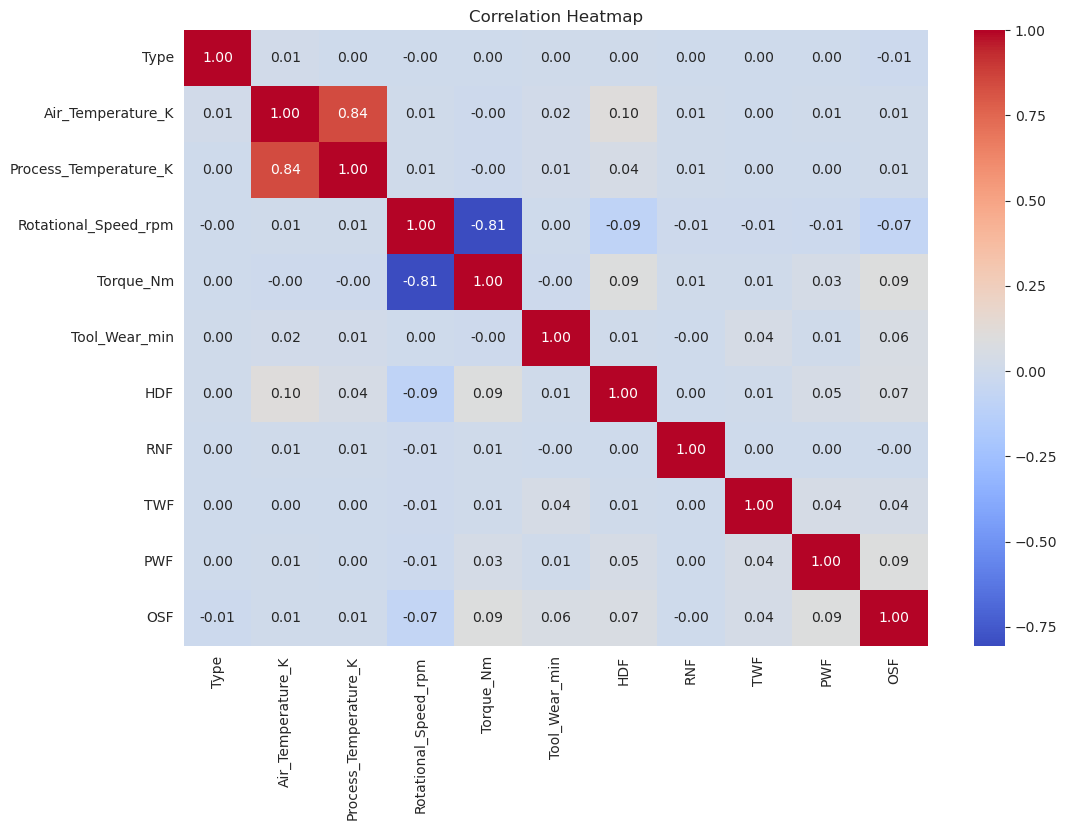

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# Compute the correlation matrix
corr_full = df_eda.corr(numeric_only=True)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

import pandas as pd

def missing_percentage(data: pd.DataFrame | pd.Series) -> pd.Series | float:
    """
    Computes the percentage of missing values for each column in a DataFrame or for a single column.

    Parameters:
    data (pd.DataFrame or pd.Series): The input DataFrame or a single column (Series).

    Returns:
    - If a DataFrame is passed: A Series with column names as index and missing percentage as values, sorted in descending order.
    - If a single column (Series) is passed: A float representing the missing percentage.
    """
    if isinstance(data, pd.DataFrame):
        return (data.isnull().sum() / len(data) * 100).round(2).sort_values(ascending=False)

    elif isinstance(data, pd.Series):
        return round(data.isnull().sum() / len(data) * 100, 2)

    else:
        raise ValueError("Input must be a pandas DataFrame or Series.")


In [38]:
missing_percentage(df_eda)

Type                     0.0
Air_Temperature_K        0.0
Process_Temperature_K    0.0
Rotational_Speed_rpm     0.0
Torque_Nm                0.0
Tool_Wear_min            0.0
HDF                      0.0
RNF                      0.0
TWF                      0.0
PWF                      0.0
OSF                      0.0
dtype: float64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- Mean/Median Imputation (For numerical data) – Maintains distribution; median is better for skewed data.
- Mode Imputation (For categorical data) – Replaces missing values with the most frequent category.

In [39]:
df_eda['Temperature Difference'] = df_eda['Process_Temperature_K'] - df_eda['Air_Temperature_K']
df_eda['Speed-Torque Interaction'] = df_eda['Rotational_Speed_rpm'] * df_eda['Torque_Nm']
df_eda['Wear Rate by rpm'] = df_eda['Tool_Wear_min'] / (df_eda['Rotational_Speed_rpm'] + 1)  # Avoid division by zero
df_eda['Failure Counts'] = df_eda[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
df_eda['Thermal Efficiency'] = df_eda['Process_Temperature_K'] / df_eda['Air_Temperature_K']


In [40]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      136429 non-null  int64  
 1   Air_Temperature_K         136429 non-null  float64
 2   Process_Temperature_K     136429 non-null  float64
 3   Rotational_Speed_rpm      136429 non-null  int64  
 4   Torque_Nm                 136429 non-null  float64
 5   Tool_Wear_min             136429 non-null  int64  
 6   HDF                       136429 non-null  int64  
 7   RNF                       136429 non-null  int64  
 8   TWF                       136429 non-null  int64  
 9   PWF                       136429 non-null  int64  
 10  OSF                       136429 non-null  int64  
 11  Temperature Difference    136429 non-null  float64
 12  Speed-Torque Interaction  136429 non-null  float64
 13  Wear Rate by rpm          136429 non-null  f

### 2. Handling Outliers

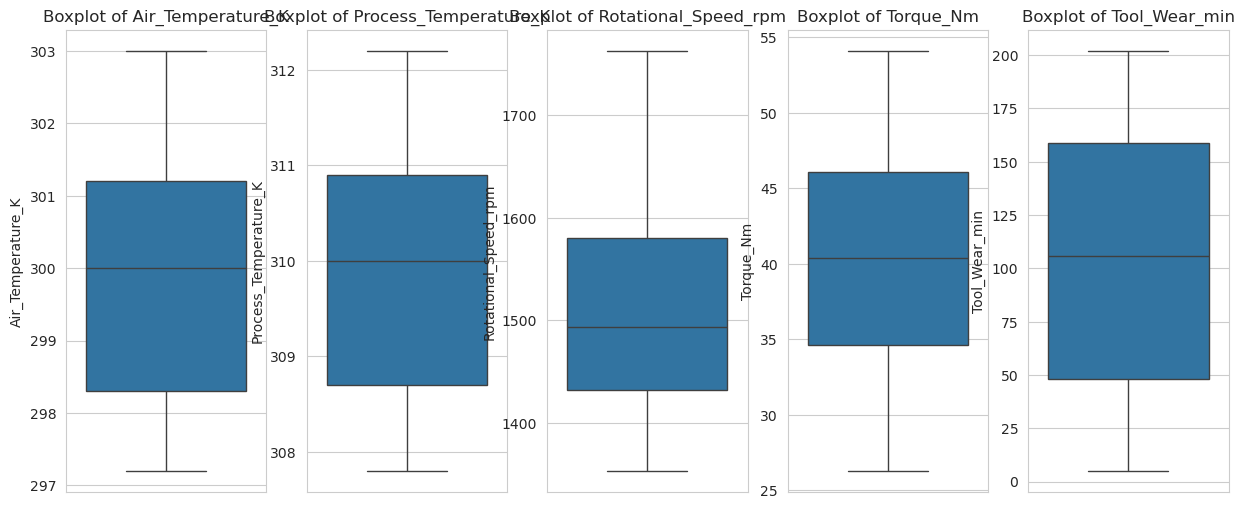

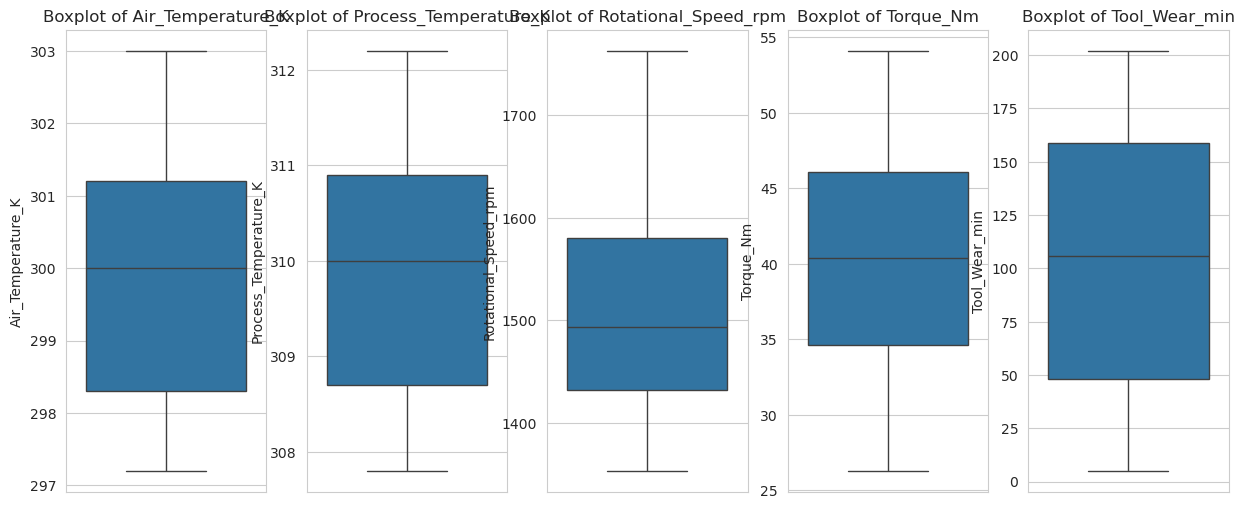

Outlier handling completed and dataset saved.


In [42]:
# Handling Outliers & Outlier treatments

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    return data[z_scores > threshold]

# Visualizing Outliers using Box Plot
def plot_boxplot(data, columns):
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i+1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')
    plt.show()

# List of numerical columns to check for outliers
num_cols = ['Air_Temperature_K', 'Process_Temperature_K', 'Rotational_Speed_rpm', 
            'Torque_Nm', 'Tool_Wear_min']

# Plot boxplots before handling outliers
plot_boxplot(cleaned_dataset, num_cols)

# Handling Outliers
for col in num_cols:
    # IQR Method (Capping outliers)
    Q1 = cleaned_dataset[col].quantile(0.05)
    Q3 = cleaned_dataset[col].quantile(0.95)
    cleaned_dataset[col] = np.clip(cleaned_dataset[col], Q1, Q3)

    # Log Transformation (for skewed data)
    if cleaned_dataset[col].skew() > 1:
        cleaned_dataset[col] = np.log1p(cleaned_dataset[col])

# Plot boxplots after handling outliers
plot_boxplot(cleaned_dataset, num_cols)

# Save the cleaned dataset
cleaned_dataset.to_csv("cleaned_dataset.csv", index=False)

print("Outlier handling completed and dataset saved.")

##### What all outlier treatment techniques have you used and why did you use those techniques?

- 1️. IQR (Interquartile Range) Capping – Caps extreme values at the 5th and 95th percentile to reduce skewness.

- 2️. Log Transformation – Reduces the impact of extreme values by compressing the scale.

- 3️. Z-Score Method – Removes values beyond ±3 standard deviations to handle extreme anomalies.

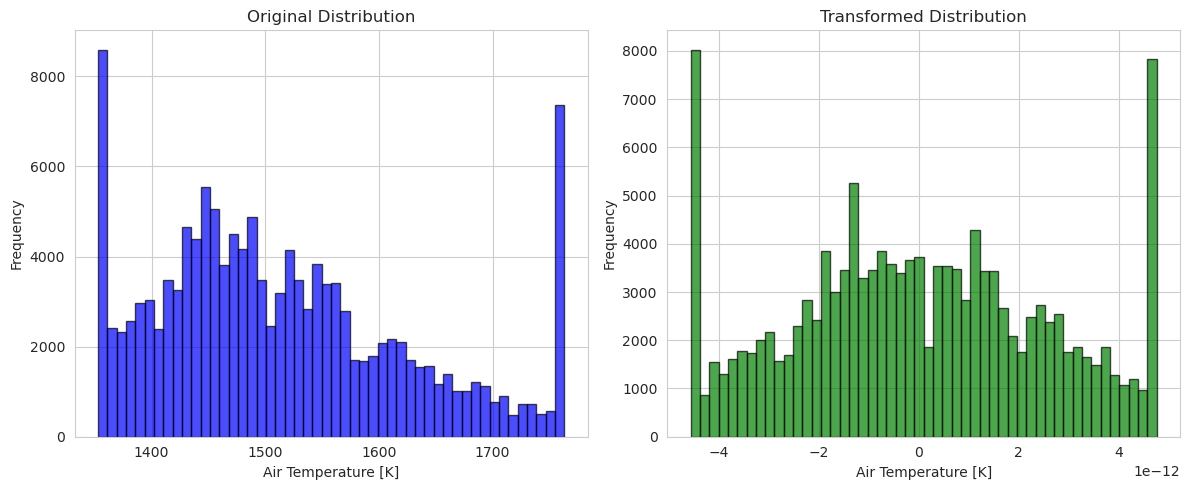

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Define figure and axes

# Original distribution
axes[0].hist(df_eda['Rotational_Speed_rpm'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Air Temperature [K]')
axes[0].set_ylabel('Frequency')

# Log-transformed distribution
# Box-Cox (only for positive values)
pt_boxcox = PowerTransformer(method='yeo-johnson')

axes[1].hist(pt_boxcox.fit_transform(df_eda[['Rotational_Speed_rpm']]),bins = 50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Transformed Distribution')
axes[1].set_xlabel('Air Temperature [K]')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


In [44]:
df_eda.columns

Index(['Type', 'Air_Temperature_K', 'Process_Temperature_K',
       'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min', 'HDF', 'RNF',
       'TWF', 'PWF', 'OSF', 'Temperature Difference',
       'Speed-Torque Interaction', 'Wear Rate by rpm', 'Failure Counts',
       'Thermal Efficiency'],
      dtype='object')

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.preprocessing import StandardScaler

In [46]:
df_eda.columns


Index(['Type', 'Air_Temperature_K', 'Process_Temperature_K',
       'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min', 'HDF', 'RNF',
       'TWF', 'PWF', 'OSF', 'Temperature Difference',
       'Speed-Torque Interaction', 'Wear Rate by rpm', 'Failure Counts',
       'Thermal Efficiency'],
      dtype='object')

### 6. Data Scaling

In [47]:
# Scaling your data
scaler = StandardScaler()

df_eda['scaled Air temp'] = scaler.fit_transform(df_eda[['Air_Temperature_K']])
df_eda[['scaled Air temp', 'Air_Temperature_K']]

,scaled Air temp,Air_Temperature_K
0,0.424163,300.6
1,1.560972,302.6
2,-0.314763,299.3
3,0.651525,301.0
4,-1.053689,298.0
...,...,...
136424,0.139961,300.1
136425,-1.337891,297.5
136426,0.367323,300.5
136427,1.049408,301.7


##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [48]:
# Split your data to train and test. Choose Splitting ratio wisely.

steel_x = df_train.drop(columns = ['id','Product ID','Machine_Failure']).copy()
steel_labels = df_train['Machine_Failure'].copy()

In [49]:
steel_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Type                   136429 non-null  int64  
 1   Air_Temperature_K      136429 non-null  float64
 2   Process_Temperature_K  136429 non-null  float64
 3   Rotational_Speed_rpm   136429 non-null  int64  
 4   Torque_Nm              136429 non-null  float64
 5   Tool_Wear_min          136429 non-null  int64  
 6   TWF                    136429 non-null  int64  
 7   HDF                    136429 non-null  int64  
 8   PWF                    136429 non-null  int64  
 9   OSF                    136429 non-null  int64  
 10  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 11.4 MB


# **Preprocessing Pipeline**
- We will add all preprocessing steps into a pipeline.
- The steps are
    - Filling missing values
    - Transforming attibutes (yeo-johnson for rotational speed)
    - Creating new features
      
      - **Total failures**= HDF + OSF + PWF + TWF + RNF ( all are binary)
      - **Speed Torque** = Rotational speed [rpm] * Torque [Nm]
      - **Wear Rate** = Tool wear [min]/(Rotational speed [rpm] + 1) , adding     1 to avoid division by zero

    - Scaling attributes

In [50]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# ✅ Functions for feature creation
def column_ratio(X):
    """Compute ratio: column1 / (column2 + 1)"""
    return np.divide(X[:, [0]], (X[:, [1]] + 1), out=np.zeros_like(X[:, [0]]), where=(X[:, [1]] != -1))

def column_addition(X):
    """Compute sum of all input columns"""
    return np.sum(X, axis=1).reshape(-1, 1)

def column_multiplication(X):
    """Compute multiplication of two input columns"""
    return np.prod(X, axis=1).reshape(-1, 1)

# ✅ Dynamic feature naming functions
def ratio_name(function_transformer, feature_names_in_):
    return [f"{feature_names_in_[0]}_to_{feature_names_in_[1]}_ratio"]

def addition_name(function_transformer, feature_names_in_):
    return ["_".join(feature_names_in_) + "_sum"]

def multiplication_name(function_transformer, feature_names_in_):
    return ["_".join(feature_names_in_) + "_product"]

# ✅ Feature Engineering Pipelines
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

def addition_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_addition, feature_names_out=addition_name),
        StandardScaler()
    )

def multiplication_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_multiplication, feature_names_out=multiplication_name),
        StandardScaler()
    )

# ✅ Yeo-Johnson transformation pipeline
yeo_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson'),
    StandardScaler()
)

# ✅ Default pipeline for numerical features
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# ✅ Categorical Pipeline with Ordinal Encoding
order = [[0, 1, 2]]  # Assuming 'Type' is categorical with 3 levels
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(categories=order)
)

# ✅ ColumnTransformer for preprocessing
preprocessing = ColumnTransformer([

    ("prepared", default_num_pipeline, ['Process_Temperature_K', 'Air_Temperature_K', 'Torque_Nm',
                                        'Tool_Wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
    ("yeo", yeo_pipeline, ['Rotational_Speed_rpm']),

    # Feature Engineering
    ("failure", addition_pipeline(), ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
    ("Speed*Torque", multiplication_pipeline(), ['Rotational_Speed_rpm', 'Torque_Nm']),
    ("Wear_rpm", ratio_pipeline(), ['Tool_Wear_min', 'Rotational_Speed_rpm']),

    ('cat', cat_pipeline, ['Type'])
], remainder=default_num_pipeline)

# ✅ Transform Data and Convert to DataFrame
def transform_to_dataframe(preprocessing, X):
    transformed_array = preprocessing.fit_transform(X)
    transformed_columns = preprocessing.get_feature_names_out()
    return pd.DataFrame(transformed_array, columns=transformed_columns, index=X.index)

# Example Usage:
# df_transformed = transform_to_dataframe(preprocessing, df)


In [51]:
print(steel_x.shape)
print(steel_x.columns)


(136429, 11)
Index(['Type', 'Air_Temperature_K', 'Process_Temperature_K',
       'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min', 'TWF', 'HDF',
       'PWF', 'OSF', 'RNF'],
      dtype='object')


In [52]:
steel_x_prepared = transform_to_dataframe(preprocessing, steel_x)

## **Confirming application of preprocessing pipeline**

In [53]:
steel_x_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   prepared__Process_Temperature_K                        136429 non-null  float64
 1   prepared__Air_Temperature_K                            136429 non-null  float64
 2   prepared__Torque_Nm                                    136429 non-null  float64
 3   prepared__Tool_Wear_min                                136429 non-null  float64
 4   prepared__TWF                                          136429 non-null  float64
 5   prepared__HDF                                          136429 non-null  float64
 6   prepared__PWF                                          136429 non-null  float64
 7   prepared__OSF                                          136429 non-null  float64
 8   prepared__RNF                     

In [54]:
steel_x.describe()

,Type,Air_Temperature_K,Process_Temperature_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,1.170264,299.853766,309.933096,1514.526677,40.343859,104.148231,0.001554,0.005160,0.002397,0.003958,0.002258
std,0.521617,1.759317,1.297824,111.492884,7.692019,62.924924,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,297.200000,307.800000,1353.000000,26.300000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,303.000000,312.200000,1763.000000,54.100000,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
steel_x_prepared.describe()

,prepared__Process_Temperature_K,prepared__Air_Temperature_K,prepared__Torque_Nm,prepared__Tool_Wear_min,prepared__TWF,prepared__HDF,prepared__PWF,prepared__OSF,prepared__RNF,yeo__Rotational_Speed_rpm,failure__TWF_HDF_PWF_OSF_RNF_sum,Speed*Torque__Rotational_Speed_rpm_Torque_Nm_product,Wear_rpm__Tool_Wear_min_to_Rotational_Speed_rpm_ratio,cat__Type
count,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,1.364290e+05,136429.000000
mean,2.612221e-14,-2.697884e-14,1.189750e-15,-1.026526e-16,-1.947848e-17,-2.015554e-17,3.192596e-17,-4.479009e-17,1.343703e-17,-1.458282e-18,7.343492e-18,1.346828e-15,5.406060e-17,1.170264
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.521617
min,-1.643601e+00,-1.508412e+00,-1.825777e+00,-1.575665e+00,-3.945048e-02,-7.202055e-02,-4.901642e-02,-6.303833e-02,-4.756777e-02,-1.769340e+00,-1.170050e-01,-2.893613e+00,-1.573629e+00,0.000000
25%,-9.501296e-01,-8.831675e-01,-7.467324e-01,-8.923084e-01,-3.945048e-02,-7.202055e-02,-4.901642e-02,-6.303833e-02,-4.756777e-02,-7.117877e-01,-1.170050e-01,-7.229420e-01,-8.819129e-01,1.000000
50%,5.155084e-02,8.312033e-02,7.298659e-03,2.942834e-02,-3.945048e-02,-7.202055e-02,-4.901642e-02,-6.303833e-02,-4.756777e-02,-5.069909e-02,-1.170050e-01,-1.576146e-02,2.912944e-02,1.000000
75%,7.450219e-01,7.652058e-01,7.483292e-01,8.717050e-01,-3.945048e-02,-7.202055e-02,-4.901642e-02,-6.303833e-02,-4.756777e-02,7.136981e-01,-1.170050e-01,7.177845e-01,8.498424e-01,1.000000
max,1.746702e+00,1.788334e+00,1.788372e+00,1.555062e+00,2.534824e+01,1.388493e+01,2.040133e+01,1.586336e+01,2.102264e+01,1.844351e+00,2.278526e+01,4.075901e+00,1.903507e+00,2.000000


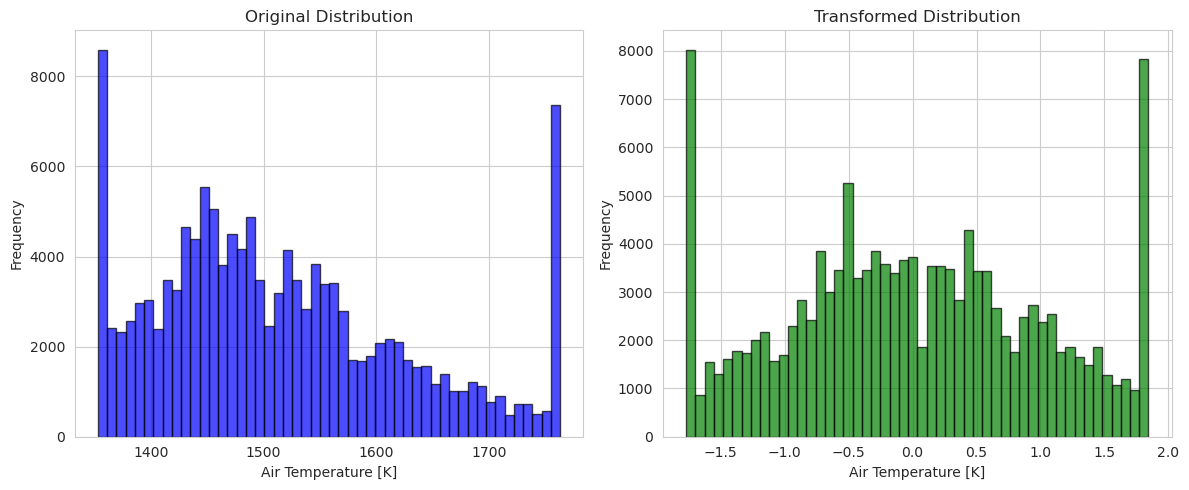

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Define figure and axes

# Original distribution
axes[0].hist(df_eda['Rotational_Speed_rpm'], bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('Air Temperature [K]')
axes[0].set_ylabel('Frequency')



axes[1].hist(steel_x_prepared['yeo__Rotational_Speed_rpm'],bins = 50, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Transformed Distribution')
axes[1].set_xlabel('Air Temperature [K]')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better visualization
plt.show()


## **Insights**
- All preprocessing steps seems to be working fine as we can check through statistical discription including standard deviation, mean and new scaled values Scaling step is working fine for all attributes.
- cat_Type is also showing ordinal values (0,1,2).
- yeo- johnson transformation on rotational speed is also working great.
- and also no missing values.

So, our data is ready for machine learning models.

## ***7. ML Model Implementation***

# Model Selection
- We can start with rough evaluation on these classification algorithms
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier
  - Support Vector Classifier
  - Adaboost



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('preprocessing', preprocessing),
    ('log_reg', LogisticRegression(
        random_state=42,  # Ensures reproducibility
        solver='lbfgs',  # Default solver
        max_iter=200,  # Increases iterations to prevent convergence issues
        C=1.0,  # Regularization strength (default, can be tuned)
    ))
])
log_reg

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process_Temperature_K',
                                                   'Air_Temperature_K',
                                                   'Torque_...
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7198afbd2b60>,
                                                                                       func=<function column_ratio at 0x7198b0623c40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool_Wear_min',
                                                   'Rotational_Speed_rpm']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2]]))]),
                                                  ['Type'])])),
                ('log_reg', LogisticRegression(max_iter=200, random_state=42))])

**We dont want to train the model for now to avoid data leakage as we may want to use cross validation for calculating evaluation metrics**

In [58]:
log_reg.fit(steel_x, steel_labels)
log_reg_predictions = log_reg.predict(steel_x)

In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(steel_labels, log_reg_predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9962



## **Support Vector Classifier (SVC)**  
- **Performs large margin classification** by finding the optimal decision boundary that maximizes the margin between classes.  
- Can work with **linear and non-linear decision boundaries** using **kernel tricks** (e.g., linear, polynomial, RBF).  
- Uses **stochastic gradient descent (SGD)** or **quadratic programming solvers** to optimize the classification boundary.  
- **Hinge loss function** is used for optimization:  

 


In [62]:
from sklearn.svm import SVC

svc = Pipeline([
    ('preprocessing', preprocessing),
    ('svc', SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)) # default settings
])

svc


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process_Temperature_K',
                                                   'Air_Temperature_K',
                                                   'Torque_...
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7198afbd2b60>,
                                                                                       func=<function column_ratio at 0x7198b0623c40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool_Wear_min',
                                                   'Rotational_Speed_rpm']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2]]))]),
                                                  ['Type'])])),
                ('svc', SVC(random_state=42))])

**We dont want to train the model for now to avoid data leakage as we may want to use cross validation for calculating evaluation metrics**

In [63]:
svc.fit(steel_x, steel_labels)
svc_predictions = svc.predict(steel_x)

In [64]:
# Score
accuracy = accuracy_score(steel_labels, svc_predictions)
print(f"SVC Accuracy: {accuracy:.4f}")

SVC Accuracy: 0.9962


## **Decision Tree Classifier (DTC)**  
- A **non-parametric** model that makes decisions by **splitting data** into branches based on feature values.  
- Works by recursively **partitioning** the dataset into **homogeneous subsets**.  
- Uses **Gini impurity** or **entropy** to determine the best splits.  

In [65]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = Pipeline([
    ('preprocessing', preprocessing),
    ('DecisionTree', DecisionTreeClassifier(
        criterion="gini",          # Default: "gini" (use "entropy" for Information Gain)
        max_depth=10,              # Default: None (tree grows until all leaves are pure)
        min_samples_split=5,       # Default: 2 (minimum samples required to split an internal node)
        min_samples_leaf=2,        # Default: 1 (minimum samples required in a leaf node)
        random_state=42            # Ensures reproducibility (Default: None)
    ))
])
tree_clf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process_Temperature_K',
                                                   'Air_Temperature_K',
                                                   'Torque_...
                                                                                       func=<function column_ratio at 0x7198b0623c40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool_Wear_min',
                                                   'Rotational_Speed_rpm']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2]]))]),
                                                  ['Type'])])),
                ('DecisionTree',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [66]:
tree_clf.fit(steel_x, steel_labels)
tree_clf_predictions = tree_clf.predict(steel_x)


In [67]:
#Score
accuracy = accuracy_score(steel_labels, tree_clf_predictions)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9964


## **Random Forest Classifier (RFC)**  
- An **ensemble learning method** that builds **multiple decision trees** and combines their predictions.  
- Reduces **overfitting** by averaging multiple models (**bagging**).  
- Uses **random feature selection** at each split, increasing diversity among trees.  


In [68]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = Pipeline([
    ('preprocessing', preprocessing),
    ('RandomForest', RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42))
])
rnd_clf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('prepared',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Process_Temperature_K',
                                                   'Air_Temperature_K',
                                                   'Torque_...
                                                                                       func=<function column_ratio at 0x7198b0623c40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Tool_Wear_min',
                                                   'Rotational_Speed_rpm']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[[0,
                                                                                               1,
                                                                                               2]]))]),
                                                  ['Type'])])),
                ('RandomForest',
                 RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                        random_state=42))])

In [69]:
rnd_clf.fit(steel_x, steel_labels)
rnd_clf_predictions = rnd_clf.predict(steel_x)

In [70]:
# Score 
accuracy = accuracy_score(steel_labels, rnd_clf_predictions)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9997


## **Boosting using XGBoost**  
- **XGBoost (Extreme Gradient Boosting)** is a powerful ensemble learning algorithm based on **gradient boosting**.  
- It builds multiple **weak learners (decision trees)** sequentially, improving each step by correcting previous errors.  
- Uses **gradient descent** to minimize a loss function.  

- **We require version 2.1.4 of xgboost**

In [71]:
import xgboost
import sklearn

print(f"xgboost: {xgboost.__version__}")
print(f"scikit-learn: {sklearn.__version__}")


xgboost: 2.1.4
scikit-learn: 1.5.1


In [72]:
from xgboost import XGBClassifier

xgb_clf = Pipeline([
    ("Preprocessing", preprocessing),
    ("XGBoost", XGBClassifier(
        n_estimators=500,        # Number of boosting rounds (trees) (Default: 100)
        learning_rate=0.1,       # Step size shrinkage to prevent overfitting (Default: 0.3)
        max_depth=6,             # Maximum depth of each tree (Default: 6)
        subsample=0.8,           # Fraction of training data used per boosting round (Default: 1)
        colsample_bytree=0.8,    # Fraction of features used per tree (Default: 1)
        random_state=42          # Ensures reproducibility (Default: None)
        # reg_lambda=1  default l2 regularization
        # # reg_alpha = 0 default
    ))
])


In [73]:

xgb_clf.fit(steel_x, steel_labels)
xgb_clf_predictions = xgb_clf.predict(steel_x)


In [74]:
# Score
accuracy = accuracy_score(steel_labels, xgb_clf_predictions)
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.9976



**Had we trained the models on the complete dataset and used direct predictions instead of cross-validation, the results would look like this:**  
- Logistic Regression and SVC show similar performance.  
- Decision Tree, Random Forest, and XGBoost classifiers exhibit overfitting, producing overly optimistic results that could be misleading.  
- *Note:* The DecisionTreeClassifier was used without parameter constraints in this scenario.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File
import joblib

# Save the model
joblib.dump(rnd_clf, "best_model.pkl")

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [77]:
df_unseen.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [85]:
import pandas as pd
import joblib

# Load the saved Random Forest model
model = joblib.load("best_model.pkl")
print("Model loaded successfully!")

# Load unseen test data
df_unseen = pd.read_csv("test.csv")

# Rename columns to match training data
df_unseen.rename(columns={
    'Air temperature [K]': 'Air_Temperature_K',
    'Process temperature [K]': 'Process_Temperature_K',
    'Rotational speed [rpm]': 'Rotational_Speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_Wear_min',
}, inplace=True)

# Define the required features (same as during training)
selected_features = [
    'Type', 'Air_Temperature_K', 'Process_Temperature_K', 
    'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min', 
    'HDF', 'RNF', 'TWF', 'PWF', 'OSF'
]

# Keep only the selected features in df_unseen
df_unseen = df_unseen[selected_features]

# Manual mapping for unknown categories
category_mapping = {'L': 0, 'H': 1, 'M': 2}  # Assign numeric values

# Convert unknown categories to numbers
df_unseen['Type'] = df_unseen['Type'].replace(category_mapping)

# Load the saved LabelEncoder for 'Type'
encoder = joblib.load("best_model.pkl")  # Ensure you saved this during training


# Predict using the loaded model
predictions = model.predict(df_unseen)

# Display first 10 predictions
print("Predictions:", predictions[:10])

# Save predictions to a CSV file
df_unseen['Predictions'] = predictions
df_unseen.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")


Model loaded successfully!


/tmp/ipykernel_12044/2902989509.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_unseen['Type'] = df_unseen['Type'].replace(category_mapping)


Predictions: [0 0 0 0 0 0 0 0 0 0]
Predictions saved to predictions.csv


In [86]:
print(df_unseen.head())
print(df_unseen.describe())  # Check statistics of numerical features
print(df_unseen['Type'].value_counts())  # Ensure categorical encoding worked


   Type  Air_Temperature_K  Process_Temperature_K  Rotational_Speed_rpm  \
0     0              302.3                  311.5                  1499   
1     0              301.7                  311.0                  1713   
2     0              301.3                  310.4                  1525   
3     2              300.1                  309.6                  1479   
4     2              303.4                  312.3                  1515   

   Torque_Nm  Tool_Wear_min  HDF  RNF  TWF  PWF  OSF  Predictions  
0       38.0             60    0    0    0    0    0            0  
1       28.8             17    0    0    0    0    0            0  
2       37.7             96    0    0    0    0    0            0  
3       47.6              5    0    0    0    0    0            0  
4       41.3            114    0    0    0    0    0            0  
               Type  Air_Temperature_K  Process_Temperature_K  \
count  90954.000000       90954.000000           90954.000000   
mean       

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***